In [1]:
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install scikit-image
!pip install seaborn
!pip install -U scikit-learn scipy matplotlib
!pip install scikit-image
!pip install PyWavelets

In [1]:
import tensorflow as tf


In [2]:
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow import keras
from tensorflow.keras import optimizers
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
import time
import math


In [3]:
tf.test.is_gpu_available()

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


True

### **Importing basic libraries and APIs**

In [4]:

import pandas as pd  ##import necessary libraries
import numpy as np
import math
import matplotlib.pyplot as plt

import seaborn as sns
sns.set_theme(style="whitegrid")
plt.style.use('ggplot')


import tensorflow as tf
%load_ext tensorboard

import warnings
warnings.filterwarnings('ignore')

import os
import datetime as dt

In [5]:
tf.test.is_gpu_available()

True

In [6]:
import util

In [7]:
from util import Util

## **Loading input data**

---



In [8]:
nifty_data = pd.read_csv('NIFTY_data.csv')
nifty_data['Time']=pd.to_datetime(nifty_data['Time']).dt.date
nifty_data.set_index("Time",inplace=True)
nifty_data.dropna()
nifty_data

,Close,MACD,ATR,RSI,USD_INR_Price,VIX,Yield_1_year_bond,Yield_10_year_bond,Yield_30_year_bond
Time,,,,,,,,,
2010-02-19,4844.89,23.610268,84.714144,42.309079,46.180000,30.45,5.021,7.885,8.452
2010-02-22,4856.39,23.096611,83.460276,43.465083,46.099998,31.80,5.017,7.846,8.452
2010-02-23,4870.05,23.240533,81.138828,44.877992,46.268002,31.09,5.065,7.799,8.452
2010-02-24,4858.60,22.133636,78.622483,43.887886,46.287998,30.55,5.060,7.799,8.463
2010-02-25,4859.75,21.054430,76.188020,44.021468,46.299999,29.71,5.036,7.823,8.463
...,...,...,...,...,...,...,...,...,...
2024-04-04,22514.65,36.515170,231.216195,61.991780,83.373299,11.22,7.020,7.094,7.149
2024-04-05,22513.70,37.879463,222.557895,61.949612,83.477798,11.34,7.033,7.117,7.171
2024-04-08,22666.30,45.829626,219.775188,65.955629,83.296799,11.61,7.021,7.154,7.208


In [9]:
# banknifty = pd.read_csv('banknifty_data.csv')
# banknifty['Time']=pd.to_datetime(banknifty['Time']).dt.date
# banknifty.set_index("Time",inplace=True)
# banknifty.dropna()
# banknifty

### **Data Exploration**

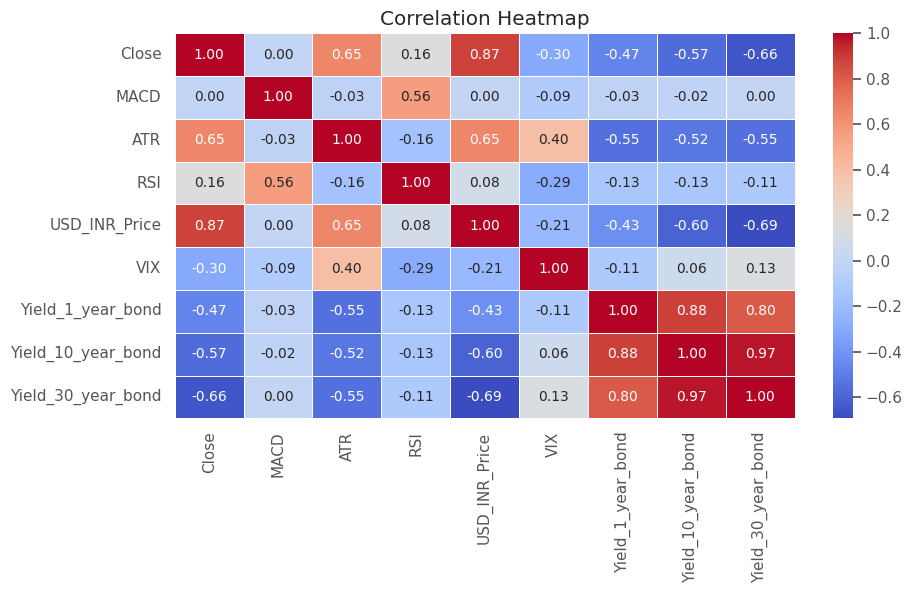

In [10]:
Util.plot_corr_heatmap(nifty_data)

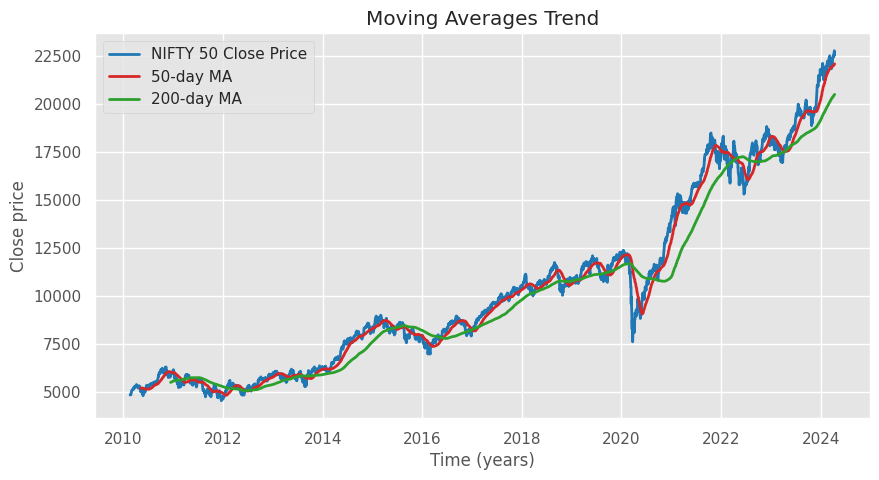

In [11]:
Util.plot_ma_trend(nifty_data)

####  **Correlation heatmap**

<Figure size 2000x1200 with 0 Axes>

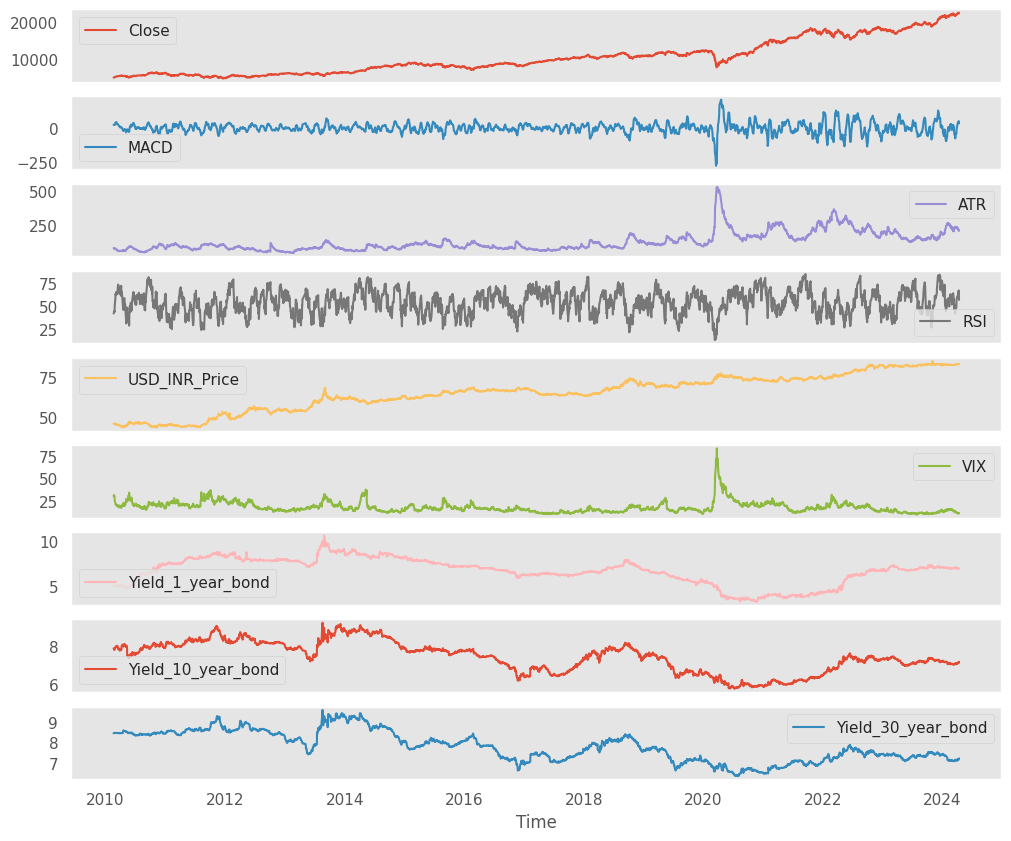

In [12]:
Util.plot_subplots(nifty_data)


### **Denoising Closing Price**

In [13]:
nifty_data = Util.denoise_data(nifty_data)



### **Machine learning libraries**

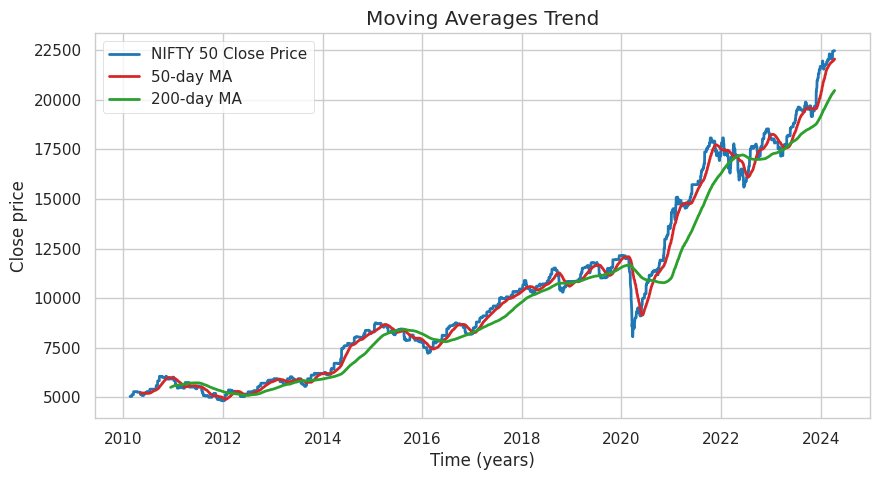

In [14]:
Util.plot_ma_trend(nifty_data)

### **Supporting functions**

In [15]:
nifty_data.head(40)

,Close,MACD,ATR,RSI,USD_INR_Price,VIX,Yield_1_year_bond,Yield_10_year_bond,Yield_30_year_bond
Time,,,,,,,,,
2010-02-19,5036.206420,23.610268,84.714144,42.309079,46.180000,30.45,5.021,7.885,8.452
2010-02-22,5036.206420,23.096611,83.460276,43.465083,46.099998,31.80,5.017,7.846,8.452
2010-02-23,5036.206420,23.240533,81.138828,44.877992,46.268002,31.09,5.065,7.799,8.452
2010-02-24,5036.206420,22.133636,78.622483,43.887886,46.287998,30.55,5.060,7.799,8.463
2010-02-25,5036.206420,21.054430,76.188020,44.021468,46.299999,29.71,5.036,7.823,8.463
2010-02-26,5036.206420,23.919573,80.285304,50.872124,45.900002,25.24,5.034,7.864,8.469
2010-03-02,5036.206420,31.103981,82.204211,59.044216,46.028000,22.82,5.078,7.944,8.469
2010-03-03,5036.206420,39.042013,81.914625,63.899581,45.549999,21.30,5.127,7.952,8.469
2010-03-04,5125.259588,41.908889,79.488580,63.011382,45.669998,21.24,5.175,7.945,8.469


\## **Supporting functions for results visualization**

In [16]:
drop = 0.10

In [17]:
# import util
# from util import Util

## **Function for Building Models**

### Testing

In [18]:
import util
from util import Util

In [19]:
optimizers_names = ['Adam', 'Adagrad', 'Nadam']

Util.build_model([250], 5, 10, optimizers_names[2], 0.001, 1)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 250)               261000    
                                                                 
 dense (Dense)               (None, 1)                 251       
                                                                 
Total params: 261251 (1020.51 KB)
Trainable params: 261251 (1020.51 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


## **Function for Hyperparameter Tuning**

In [45]:
def hyper_parameter_tuning(neurons, dataset, time_steps, data_split_ratio, opt_names, lr_values, batch_sizes, num_epochs, num_reps = 2 , drop = 0.2):
  #======= Data Preparation =======#
  training_set, validation_set = Util.data_split(dataset, data_split_ratio)

  num_feats = training_set.shape[1]

  min_train, max_train  = training_set["Close"].min(), training_set["Close"].max()
  min_val, max_val   = validation_set["Close"].min(), validation_set["Close"].max()

  training_set_scaled  =  Util.min_max_transform(training_set)
  validation_set_scaled    = Util.min_max_transform(validation_set)

  X_train, y_train =   Util.create_dataset(training_set_scaled, time_steps)
  X_val, y_val     =   Util.create_dataset(validation_set_scaled, time_steps)

  #======== Time Series Handling=========#

  best_avg_rmse = 99999999999

  collected_rmse = []

  all_avg_rmse_vals = np.zeros((len(opt_names), len(lr_values), len(batch_sizes)))

  best_hyper_params = {"model": neurons, "optimizer": None, "learning_rate": None, "batch_size": None,"best_avg_rmse": None}

  for opt_index in range(len(opt_names)):

    for lr_index in range(len(lr_values)):

      for batch_index in range(len(batch_sizes)):

        for rep_index in range(num_reps):

          print("Running for " + opt_names[opt_index] + " optimizer " + str(lr_values[lr_index]) +  " learning_rate " +  str(batch_sizes[batch_index]) + " batch_size and " + str(rep_index) +  " replicate " +  "\n")

          model = Util.build_model(neurons, time_steps, num_feats, opt_names[opt_index], learning_rate = lr_values[lr_index], verbose = 0 ,drop = drop)

          early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience= 5)

          history = model.fit(X_train, y_train, batch_size = batch_sizes[batch_index], epochs= num_epochs, validation_data = (X_val, y_val), callbacks=[early_stop], verbose = 1)

          #============== Predictions in Original Scale ==========#

          val_predictions    =  Util.min_max_inverse_transform(model.predict(X_val).ravel(), min_val, max_val)

          collected_rmse.append(math.sqrt(mean_squared_error(Util.min_max_inverse_transform(y_val, min_val, max_val),val_predictions)))

        avg_rmse_value = np.mean(np.array(collected_rmse))
        all_avg_rmse_vals[opt_index][lr_index][batch_index] = avg_rmse_value

        if avg_rmse_value < best_avg_rmse:
          best_avg_rmse = avg_rmse_value
          best_hyper_params = {"model": neurons,  "optimizer": opt_names[opt_index], "learning_rate": lr_values[lr_index], "batch_size": batch_sizes[batch_index], "best_avg_rmse": best_avg_rmse}

  output_results = {
      "best_hyper_parameters":  best_hyper_params,
      "all_avg_rmse": all_avg_rmse_vals
       }

  # Writing output to a file

  file_name = "sl-lstm-" + str(neurons[0])+ "-validation_results"+ str(time.time())+ ".txt"
  Util.write_dic_to_file(output_results, file_name)

  print("Best_hyper_parameters: \n", output_results['best_hyper_parameters'])
  print("all_avg_rmse: \n", output_results['all_avg_rmse'])

  return output_results['best_hyper_parameters']


### **Case I: Tuning parameter of 10N-singlelayer-LSTM**

In [21]:
layers = [10]
time_step = 5
optimizers_names = ['Adam', 'Adagrad', 'Nadam']
#optimizers_names = ['Adam']
learning_rates =  [0.1, 0.01, 0.001]
# learning_rates =  [ 0.01]

batch_sizes =  [4, 8, 16]
# batch_sizes =  [8]
epochs = 100
num_replicates = 1
test_split = 0.2
val_split = 0.2
drop = 0.2
train_data, test_data = Util.data_split(nifty_data, test_split)

N10_best_hyper_parameters = hyper_parameter_tuning(layers, train_data, time_step, val_split, optimizers_names, learning_rates, batch_sizes, num_epochs = epochs, num_reps = num_replicates,drp = drop)
N10_best_hyper_parameters


### **Case II: Tuning parameter of 30N-singlelayer-LSTM**

In [22]:
# layers = [30]
# time_step = 5
# optimizers_names = ['Adam', 'Adagrad', 'Nadam']
# #optimizers_names = ['Adam']
# learning_rates =  [0.1, 0.01, 0.001]
# # learning_rates =  [ 0.01]

# batch_sizes =  [4, 8, 16]
# # batch_sizes =  [8]
# epochs = 10
# num_replicates = 1
# test_split = 0.2
# val_split = 0.2
# drop = 0.2
# train_data, test_data = data_split(data, test_split)

# N30_best_hyper_parameters = hyper_parameter_tuning(layers, train_data, time_step, val_split, optimizers_names, learning_rates, batch_sizes, epochs = epochs, num_replicates = num_replicates,drop = drop)
# N30_best_hyper_parameters


### **Case III: Tuning parameter of 50N-singlelayer-LSTM**

---



In [23]:
# layers = [50]
# time_step = 5
# optimizers_names = ['Adam', 'Adagrad', 'Nadam']
# learning_rates =  [0.1, 0.01, 0.001]
# batch_sizes =  [4, 8, 16]
# epochs = 10
# num_replicates = 1
# test_split = 0.2
# val_split = 0.2
# drop = 0.2

# train_data, test_data = data_split(data, test_split)

# N50_best_hyper_parameters = hyper_parameter_tuning(layers, train_data, time_step, val_split, optimizers_names, learning_rates, batch_sizes, epochs = epochs, num_replicates = num_replicates,drop = drop)
# N50_best_hyper_parameters


### **Case IV: Tuning parameter of 100N-singlelayer-LSTM**

---

In [24]:
# layers = [100]
# time_step = 5
# optimizers_names = ['Adam', 'Adagrad', 'Nadam']
# learning_rates =  [0.1, 0.01, 0.001]
# batch_sizes =  [4, 8, 16]
# epochs =  10
# num_replicates = 1
# test_split = 0.2
# val_split = 0.2
# drop = 0.2

# train_data, test_data = data_split(data, test_split)

# N100_best_hyper_parameters = hyper_parameter_tuning(layers, train_data, time_step, val_split, optimizers_names, learning_rates, batch_sizes, epochs = epochs, num_replicates = num_replicates,drop = drop)
# N100_best_hyper_parameters


### **Case V: Tuning parameter of 150N-singlelayer-LSTM**

In [25]:
# layers = [150]
# time_step = 5
# optimizers_names = ['Adam', 'Adagrad', 'Nadam']
# #optimizers_names = ['Adam']
# learning_rates =  [0.1, 0.01, 0.001]
# # learning_rates =  [ 0.01]

# batch_sizes =  [4, 8, 16]
# # batch_sizes =  [8]
# epochs = 10
# num_replicates = 1
# test_split = 0.2
# val_split = 0.2
# drop = 0.2

# train_data, test_data = data_split(data, test_split)

# N150_best_hyper_parameters = hyper_parameter_tuning(layers, train_data, time_step, val_split, optimizers_names, learning_rates, batch_sizes, epochs = epochs, num_replicates = num_replicates,drop = drop)
# N150_best_hyper_parameters


### **Case VI: Tuning parameter of 200N-singlelayer-LSTM**

In [26]:
# layers = [200]
# time_step = 5
# optimizers_names = ['Adam', 'Adagrad', 'Nadam']
# learning_rates =  [0.1, 0.01, 0.001]
# batch_sizes =  [4, 8, 16]
# epochs =  50
# num_replicates = 10
# test_split = 0.2
# val_split = 0.2
# drop = 0.2

# train_data, test_data = data_split(data, test_split)

# N200_best_hyper_parameters = hyper_parameter_tuning(layers, train_data, time_step, val_split, optimizers_names, learning_rates, batch_sizes, epochs = epochs, num_replicates = num_replicates,drop = drop)
# N200_best_hyper_parameters

### **Case VII: Tuning parameter of 300N-singlelayer-LSTM**

In [ ]:
# layers = [300]
# time_step = 5
# optimizers_names = ['Adam', 'Adagrad', 'Nadam']
# learning_rates =  [0.1, 0.01, 0.001]
# batch_sizes =  [4, 8, 16]
# epochs =  50
# num_replicates = 10
# test_split = 0.2
# val_split = 0.2
# drop = 0.2

# train_data, test_data = data_split(data, test_split)

# N200_best_hyper_parameters = hyper_parameter_tuning(layers, train_data, time_step, val_split, optimizers_names, learning_rates, batch_sizes, epochs = epochs, num_replicates = num_replicates,drop = drop)
# N200_best_hyper_parameters

## **Building and Running  Single-Layer Models in Full Scale**

In [27]:
import time

In [28]:
#========== Model hyperparameters setting ==========================#
def LSTM_model(neuron_units, hp_parameters, dataset, time_steps=5, test_ratio=0.2, epochs=20, num_runs=2,dropout = 0.2):

  #====== Data transformation==========#
  print("Progress: Performing data preparation steps.......\n")

  #======= Creating training and test datasets===#

  train_set, test_set = Util.data_split(dataset, test_ratio)

  num_features = train_set.shape[1]

  min_train, max_train = train_set["Close"].min(), train_set["Close"].max()
  min_test, max_test =  test_set["Close"].min(), test_set["Close"].max()

  scaled_train_set =  Util.min_max_transform(train_set)
  scaled_test_set = Util.min_max_transform(test_set)


  X_train, y_train = Util.create_dataset(scaled_train_set, time_steps)
  X_test, y_test = Util.create_dataset(scaled_test_set, time_steps)

  y_train_orig =  Util.min_max_inverse_transform(y_train, min_train, max_train) #in original scale
  y_test_orig =  Util.min_max_inverse_transform(y_test, min_test, max_test) #in original scale


  print("Progress: Building and training models.......\n")

  neuron_units = np.array(neuron_units)
  #============ Arrays for collecting test scores ================#
  rmse_array = np.zeros((len(neuron_units), num_runs))
  mape_array = np.zeros((len(neuron_units), num_runs))
  R_array    = np.zeros((len(neuron_units), num_runs))
  elapsed_time_array = np.zeros((len(neuron_units), num_runs))


  #========== Array for collecting history and predictions =======#
  models_history = []
  train_predictions = []
  test_predictions = []

  for i in range(len(neuron_units)):

    print("Model hyperparameters used: \n ", hp_parameters[i])
    #========== Saving history and predictions per run=====#
    model_history_per_run = []
    train_predictions_per_run = []
    test_predictions_per_run  = []

    hidden_nodes = int(neuron_units[i])

    for k in range(num_runs):

      print("Running for %d neurons and %d run ----->\n" %(hidden_nodes, k))

      layers = [hidden_nodes]

      model = Util.build_model(layers, time_steps, num_features, optimizer=hp_parameters[i][0], learning_rate=hp_parameters[i][1], verbose=0 , drop = dropout )
      callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=5)
      start = time.time()
      history = model.fit(X_train, y_train, batch_size=hp_parameters[i][2], epochs=epochs, callbacks=[callback], verbose=1)
      end = time.time()
      elapsed_time = end - start

      model_history_per_run.append(history)


      #==============Making train and test predictions in original scales ==========
      train_pred = Util.min_max_inverse_transform(model.predict(X_train).ravel(), min_train, max_train) #in original scale
      test_pred = Util.min_max_inverse_transform(model.predict(X_test).ravel(), min_test, max_test)

      train_predictions_per_run.append(train_pred)
      test_predictions_per_run.append(test_pred)

      #============== Calculating performance scores=========
      scores = Util.calculate_scores(Util.min_max_inverse_transform(y_test, min_test, max_test), test_pred)
      rmse_array[i][k] = scores['rmse']
      mape_array[i][k] =  scores['mape']
      R_array[i][k] = scores['R']
      elapsed_time_array[i][k] = elapsed_time

    models_history.append(model_history_per_run)
    train_predictions.append(train_predictions_per_run)
    test_predictions.append(test_predictions_per_run)

  print("Progress: Collecting outputs.......\n")

  neurons_df = pd.DataFrame(neuron_units)
  rmse_df = pd.DataFrame(rmse_array)
  mape_df  = pd.DataFrame(mape_array)
  R_df    = pd.DataFrame(R_array)
  elapsed_time_df =  pd.DataFrame(elapsed_time_array)

  train_predictions  = np.array(train_predictions)
  test_predictions   = np.array(test_predictions)

  #==== Identifying the best model results based on RMSE ===============#
  min_index = pd.DataFrame(rmse_df.min(axis=1)).idxmin()[0]
  min_col = pd.DataFrame(rmse_df.min(axis=0)).idxmin()[0]

  best_neurons_rmse = neurons_df.loc[min_index, 0]

  best_rmse = rmse_df.loc[min_index, min_col]
  best_mape = mape_df.loc[min_index, min_col]
  best_R =  R_df.loc[min_index, min_col]
  best_elapsed_time = elapsed_time_df.loc[min_index, min_col]

  train_predictions_best_rmse = train_predictions[min_index][min_col]
  print(train_predictions_best_rmse.shape)
  test_predictions_best_rmse = test_predictions[min_index][min_col]

  loss_best_rmse = models_history[min_index][min_col].history['loss']


  output_dict ,avg_scores , all_stds ,all_minimums,all_maximums = Util.create_output_dict(neuron_units, min_index, min_col, best_rmse, best_mape, best_R, best_elapsed_time,
                       train_predictions_best_rmse, test_predictions_best_rmse, loss_best_rmse,
                       hp_parameters, epochs, time_steps, num_runs, test_ratio,
                       rmse_df, mape_df, R_df, elapsed_time_df,
                       train_predictions, test_predictions, models_history,
                       dataset, X_train, X_test, y_train_orig, y_test_orig)
  print("\nBest model (neurons, run, RMSE): ", best_neurons_rmse, min_col, best_rmse)
  print('\nAverage scores:\n', avg_scores)
  print('\nStandard deviations:\n', all_stds)
  print('\nMinimums:\n', all_minimums)
  print('\nMaximums:\n', all_maximums)
  print("\nProgress: All tasks completed successfully!\n")

  # Save all RMSEs in a file for statistical study
  # scores['rmse'].to_csv('custom-lstm-all-rmse.csv')
  print(scores['rmse'])
  # Write output dictionary in the file
  file_name =  "single-lstm-results.txt"
  Util.write_dict_to_file(output_dict, file_name)

  return output_dict


# **Building Multi-Layer LSTM Models**

In [43]:
def tune_hyperparameters_multi_layer(layers_config, dataset, time_steps, split_ratio, optimizer_names, learning_rates, batch_sizes, epochs, num_runs=2 , drop = 0.2):

  # Splitting data into training and validation sets
  train_data, val_data = Util.data_split(dataset, split_ratio)

  num_features = train_data.shape[1]

  min_train, max_train = train_data["Close"].min(), train_data["Close"].max()
  min_val, max_val = val_data["Close"].min(), val_data["Close"].max()

  train_data_scaled = Util.min_max_transform(train_data)
  val_data_scaled = Util.min_max_transform(val_data)

  X_train, y_train = Util.create_dataset(train_data_scaled, time_steps)
  X_val, y_val = Util.create_dataset(val_data_scaled, time_steps)

  best_avg_rmse = float('inf')
  all_avg_rmse = np.zeros((len(optimizer_names), len(learning_rates), len(batch_sizes)))

  best_hyperparameters = {"model_config": layers_config, "optimizer": None, "learning_rate": None, "batch_size": None, "best_avg_rmse": None}

  for opt_index, optimizer in enumerate(optimizer_names):
    for lr_index, learning_rate in enumerate(learning_rates):
      for batch_size_index, batch_size in enumerate(batch_sizes):
        rmse_values = []

        for i in range(num_runs):
          print("Running for optimizer: {}, learning rate: {}, batch size: {}, replicate: {}\n".format(optimizer, learning_rate, batch_size, i))

          model = Util.build_model(layers_config, time_steps, num_features, optimizer, learning_rate=learning_rate, verbose=0 ,drop = drop)
          callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

          history = model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(X_val, y_val), callbacks=[callback], verbose=1)

          val_predictions = Util.min_max_inverse_transform(model.predict(X_val).ravel(), min_val, max_val)
          rmse = math.sqrt(mean_squared_error(Util.min_max_inverse_transform(y_val, min_val, max_val), val_predictions))
          rmse_values.append(rmse)

        avg_rmse = np.mean(np.array(rmse_values))
        all_avg_rmse[opt_index][lr_index][batch_size_index] = avg_rmse

        if avg_rmse < best_avg_rmse:
          best_avg_rmse = avg_rmse
          best_hyperparameters = {"model_config": layers_config, "optimizer": optimizer, "learning_rate": learning_rate, "batch_size": batch_size, "best_avg_rmse": best_avg_rmse}

  output_dict = {
      "best_hyperparameters": best_hyperparameters,
      "all_avg_rmse": all_avg_rmse
  }

  # Writing output dictionary to file
  file_name = "tuned-hyperparameters-{}-neurons-validation-results.txt".format(layers_config)
  Util.write_dict_to_file(output_dict, file_name)

  print("Best hyperparameters:\n", output_dict['best_hyperparameters'])
  print("All average RMSE:\n", output_dict['all_avg_rmse'])

  return output_dict['best_hyperparameters']


## **Case I: Tuning Hyperparameters of 10-5N LSTM**

In [44]:
# layers = [[10, 5], [20, 10], [50, 20], [100, 50], [150, 100], [100, 50, 20]]
# time_step = 20
# optimizers_names = ['Adam', 'Adagrad', 'Nadam']
# learning_rates =  [0.1, 0.01]
# batch_sizes =  [4, 8]
# epochs =  10
# num_replicates = 1
# test_split = 0.2
# val_split = 0.2
#drop =0

# train_data, test_data = Util.data_split(nifty_data, test_split)

# N10_5__best_hyper_parameters = tune_hyperparameters_multi_layer(layers[0], train_data, time_step, val_split, optimizers_names, learning_rates, batch_sizes, epochs = epochs, num_runs=  num_replicates , drop = drop)
# N10_5__best_hyper_parameters


Running for optimizer: Adam, learning rate: 0.1, batch size: 4, replicate: 0

Epoch 1/10
541/541 [==============================] - 8s 8ms/step - loss: 0.0091 - val_loss: 0.0105
Epoch 2/10
541/541 [==============================] - 3s 6ms/step - loss: 9.6936e-04 - val_loss: 0.0014
Epoch 3/10
541/541 [==============================] - 4s 7ms/step - loss: 6.1883e-04 - val_loss: 7.1866e-04
Epoch 4/10
534/541 [============================>.] - ETA: 0s - loss: 7.4133e-04

KeyboardInterrupt: 

## **Case II: Tuning Hyperparameters of 50-20N LSTM**

In [31]:

# layers = [[50, 20]]
# time_step = 5
# optimizers_names = ['Adam', 'Adagrad', 'Nadam']
# learning_rates =  [0.1, 0.01, 0.001]
# batch_sizes =  [4, 8, 16]
# epochs =  1
# num_replicates = 1
# test_split = 0.2
# val_split = 0.2
#drop =0

# train_data, test_data = data_split(nifty_data, test_split)

# N20_10__best_hyper_parameters = hyper_parameter_tuning_multilayer(layers[0], train_data, time_step, val_split, optimizers_names, learning_rates, batch_sizes, epochs = epochs, num_replicates = num_replicates, drop = drop)
# N20_10__best_hyper_parameters


## **Case III: Tuning Hyperparameters of 300-100N LSTM**

In [32]:
# layers = [[300, 100]]
# time_step = 5
# optimizers_names = ['Adam', 'Nadam']
# learning_rates =  [0.1, 0.001]
# batch_sizes =  [4, 8]
# epochs =  2
# num_replicates = 2
# test_split = 0.2
# val_split = 0.2
#drop =0

# train_data, test_data = data_split(nifty_data, test_split)

# N50_20__best_hyper_parameters = hyper_parameter_tuning_multilayer(layers[0], train_data, time_step, val_split, optimizers_names, learning_rates, batch_sizes, epochs = epochs, num_replicates = num_replicates, drop = drop)
# N50_20__best_hyper_parameters


## **Case IV: Tuning Hyperparameters of 200-100-40N LSTM**

In [33]:
# layers = [[200, 100,40]]
# time_step = 5
# optimizers_names = ['Adam', 'Nadam']
# learning_rates =  [0.1,  0.001]
# batch_sizes =  [4, 16]
# epochs =  2
# num_replicates = 2
# test_split = 0.2
# val_split = 0.2
#drop =0

# train_data, test_data = data_split(nifty_data, test_split)

# N100_50__best_hyper_parameters = hyper_parameter_tuning_multilayer(layers[0], train_data, time_step, val_split, optimizers_names, learning_rates, batch_sizes, epochs = epochs, num_replicates = num_replicates, drop = drop)
# N100_50__best_hyper_parameters


## **Case V: Tuning Hyperparameters of 30-50-20N LSTM**

In [34]:
# layers = [[30, 50, 20]]
# time_step = 5
# optimizers_names = ['Adam', 'Adagrad']
# learning_rates =  [0.1, 0.01]
# batch_sizes =  [4, 8]
# epochs =  2
# num_replicates = 2
# test_split = 0.2
# val_split = 0.2
#drop =0

# train_data, test_data = data_split(nifty_data, test_split)

# N150_100__best_hyper_parameters = hyper_parameter_tuning_multilayer(layers[0], train_data, time_step, val_split, optimizers_names, learning_rates, batch_sizes, epochs = epochs, num_replicates = num_replicates, drop = drop)
# N150_100__best_hyper_parameters


## **Case VI: Tuning Hyperparameters of 50-50-40N LSTM**

In [35]:
# layers = [[50,50,40]]
# time_step = 5
# optimizers_names = ['Adagrad', 'Nadam']
# learning_rates =  [0.1, 0.01,]
# batch_sizes =  [4, 8]
# epochs =  2
# num_replicates = 2
# test_split = 0.2
# val_split = 0.2
#drop =0
# train_data, test_data = data_split(nifty_data, test_split)

# N100_50_20__best_hyper_parameters = hyper_parameter_tuning_multilayer(layers[0], train_data, time_step, val_split, optimizers_names, learning_rates, batch_sizes, epochs = epochs, num_replicates = num_replicates, drop = drop)
# N100_50_20__best_hyper_parameters


## **Building and Running Multi-Layers LSTM Models in Full Scale**

In [36]:
from sklearn.metrics import mean_squared_error


## **Training Multiple Models Together**

In [37]:
def run_multi_layer_LSTM_Model(hidden_layers, hyper_parameters, data, time_step = 5, test_split = 0.2, epochs = 5,  num_replicates = 2 , dropout = 0.2):

  num_models = len(hidden_layers)

  #== to collect all scores===#
  rmse = []
  mape = []
  R = []
  elapsed_time = []

  #===to collect all avg scores===#
  avg_rmse = []
  avg_mape = []
  avg_R = []
  avg_elapsed_time = []

  #=== to iteratively update the best rmse and the corresponding model
  best_avg_rmse = 99999999999
  best_rmse = 99999999999
  best_model_hidden_layers = None
  best_model_output = None

  for i in range(num_models):
    print("Running model with hidden neurons: ", hidden_layers[i])

    print("\n")

    print("Best Hyper_parameters used: ", hyper_parameters[i])

    print("\n")

    output = Util.build_multi_layer_LSTM(hidden_layers[i], hyper_parameters[i], data, time_step, test_split, epochs, num_replicates , drop = dropout)

    rmse.append(output['all_scores']['rmse'])
    mape.append(output['all_scores']['mape'])
    R.append(output['all_scores']['R'])
    elapsed_time.append(output['all_scores']['elapsed_time'])

    avg_rmse.append(output['avg_scores']['rmse'])
    avg_mape.append(output['avg_scores']['mape'])
    avg_R.append(output['avg_scores']['R'])
    avg_elapsed_time.append(output['avg_scores']['elapsed_time'])

    if avg_rmse[i] < best_avg_rmse:
      best_avg_rmse = avg_rmse[i]
      best_rmse = output['best_model']['rmse']
      best_model_hidden_layers = hidden_layers[i]
      best_model_output = output


  rmse = np.array(rmse)
  mape = np.array(mape)
  R =  np.array(R)

  # ===== Collecting all  scores================================#
  scores = {'layers': hidden_layers, 'rmse': rmse, 'mape': mape, 'R':R, 'elapsed_time': elapsed_time}

  # ======= Collecting avg scores ===============================#
  avg_scores = pd.DataFrame({'layers': hidden_layers, 'rmse': np.array(avg_rmse), 'mape': np.array(avg_mape), 'R':np.array(avg_R), 'elapsed_time':np.array(avg_elapsed_time)})

  #======= Collecting standard deviations of scores =============#
  stds = pd.DataFrame({'layers': hidden_layers, 'rmse': np.std(rmse, axis = 1), 'mape': np.std(mape, axis = 1), 'R':  np.std(R, axis = 1 ),  'elapsed_time': np.std(elapsed_time, axis = 1 )})

  #======= Collecting minimum values of test scores =============#
  minimums = pd.DataFrame({'layers': hidden_layers, 'rmse': np.min(rmse, axis =1 ), 'mape': np.min(mape, axis= 1), 'R': np.min(R, axis =1), 'elapsed_time': np.min(elapsed_time, axis =1)})

  #======= Collecting maximum values of test scores =============#
  maximums = pd.DataFrame({'layers': hidden_layers, 'rmse': np.max(rmse, axis =1), 'mape': np.max(mape, axis =1), 'R': np.max(R, axis =1),  'elapsed_time': np.max(elapsed_time,axis =1)})

  output_dictionary = {
                     'hyper_parameters': hyper_parameters[i],
                     'scores': scores,
                     'avg_scores': avg_scores,
                     'stds':stds,
                     'minimums': minimums,
                     'maximums': maximums,
                      'best_avg_rmse': best_avg_rmse,
                      'best_rmse': best_rmse,
                      'best_model_hidden_layers': best_model_hidden_layers,
                      'best_model_output': best_model_output
                      }


  print("\nBest model and its avg rmse and minimum rmse):\n", best_model_hidden_layers, best_avg_rmse, best_rmse)
  print('\nAverage scores:\n', avg_scores)
  print('\nStandard_deviations:\n', stds)
  print('\nMinimums:\n', minimums)
  print('\nMaximums:\n', maximums)


  #Save all rmse scores in the file for future analysis
  pd.DataFrame(scores['rmse']).to_csv('ml-lstm-all-rmse.csv')

  #writing output dictionary in the file
  file_name =  "ml-lstm-results.txt"
  Util.write_dict_to_file(output_dictionary, file_name)

  print("Progress: All works are done successfully, congratulations!!\n")

  return output_dictionary


# **Functions for Visualizing Multilayer Scores Boxplots**

In [38]:
def multi_layers_all_scores_boxplots(model_output):

  fig = plt.figure(figsize = (18,5))
  plt.subplot(131)
  p1 = plt.boxplot(pd.DataFrame(model_output['scores']['rmse']), patch_artist= True )
  for i, box in enumerate(p1['boxes']):
    #change outline color
    box.set(color= 'blue', linewidth = 1.2)
    # change fill color
    box.set(facecolor = 'mediumblue')
  plt.xticks([1,2,3,4,5,6], ['(10, 5)', '(20, 10)', '(50, 20)', '(100, 50)', '(150, 100)', '(100, 50, 20)'], rotation = 30)
  plt.title("(a)")
  plt.xlabel('Number of neurons')
  plt.ylabel('RMSE')

  plt.subplot(132)
  p2 = plt.boxplot(pd.DataFrame(model_output['scores']['mape']), patch_artist= True )
  for i, box in enumerate(p2['boxes']):
    #change outline color
    box.set(color= 'blue', linewidth = 1.2)
    # change fill color
    box.set(facecolor = 'indigo')
  plt.xticks([1,2,3,4,5,6], ['(10, 5)', '(20, 10)', '(50, 20)', '(100, 50)', '(150, 100)', '(100, 50, 20)'],  rotation = 30)
  plt.title("(b)")
  plt.xlabel('Number of neurons')
  plt.ylabel('MAPE')

  plt.subplot(133)
  p3 = plt.boxplot(pd.DataFrame(model_output['scores']['R']), patch_artist= True )
  for i, box in enumerate(p3['boxes']):
    #change outline color
    box.set(color= 'blue', linewidth = 1.2)
    # change fill color
    box.set(facecolor = 'darkgreen')

  plt.xticks([1,2,3,4,5,6], ['(10, 5)', '(20, 10)', '(50, 20)', '(100, 50)', '(150, 100)', '(100, 50, 20)'],  rotation = 30)
  plt.title("(c)")
  plt.xlabel('Number of neurons')
  plt.ylabel('R')

  fig.savefig( "res/multi_layers_all_scores_boxplots.png",dpi=600)
  plt.show()


In [39]:
import scipy

def read_df_from_file(file_name):
   return pd.read_csv(file_name)

def comparative_qq_plots(data1, data2):
  fig = plt.figure(figsize = (14,5))
  ax1= fig.add_subplot(121)
  scipy.stats.probplot(data1, dist=scipy.stats.norm, sparams=(0,1), plot=ax1)
  ax1.get_lines()[0].set_marker('o')
  ax1.get_lines()[0].set_markerfacecolor('mediumblue')
  ax1.get_lines()[0].set_markersize(8.0)
  ax1.get_lines()[1].set_linewidth(3.0)
  plt.title("(a)")

  ax2= fig.add_subplot(122)
  scipy.stats.probplot(data2, dist=scipy.stats.norm, sparams=(0,1), plot=ax2)
  ax2.get_lines()[0].set_marker('o')
  ax2.get_lines()[0].set_markerfacecolor('mediumblue')
  ax2.get_lines()[0].set_markersize(8.0)
  ax2.get_lines()[1].set_linewidth(3.0)
  plt.title("(b)")

  fig.savefig( "res/Errors_QQ_Plots.png",dpi=600)
  plt.show()


def comparative_boxplots(data1, data2):
  data = pd.DataFrame()
  data['Single-layer-LSTM'] = data1
  data['Multi-layer-LSTM'] = data2

  fig = plt.figure(figsize = (6,4))
  p = plt.boxplot(data.T, patch_artist= True)
  colors = ['mediumblue', 'darkred']
  for i, box in enumerate(p['boxes']):
    # change outline color
    box.set(color= 'blue', linewidth = 1.2)
    # change fill color
    box.set(facecolor = colors[i])

  plt.xticks([1,2], ['Single-layer LSTM','Multi-layer LSTM'])
  plt.ylabel('RMSE')
  fig.savefig("comparative_boxplots.png",dpi=600)
  plt.show()


def perform_normality_test(data1, data2):

  print("Performaing Normality Tests\n")
  print("Data1: ")
  print(scipy.stats.normaltest(data1))
  print("Data 2:")
  print(scipy.stats.normaltest(data2))

#=========F test for equality of variances =====================================
def ftest(data1, data2):
    x = np.array(data1)
    y = np.array(data2)
    f = np.var(x, ddof=1)/np.var(y, ddof=1) #calculate F test statistic
    dfn = x.size-1 #define degrees of freedom numerator
    dfd = y.size-1 #define degrees of freedom denominator
    p = 1-scipy.stats.f.cdf(f, dfn, dfd) #find p-value of F test statistic
    return f, p


def perform_ttest(data1, data2):
  #student_ttest, pvalue_student=scipy.stats.ttest_ind(data1, data2, equal_var = True) # It requires variences to be equal.
  print("\nTwo-sample ttest")
  print(scipy.stats.ttest_ind(data1, data2, equal_var = False))  # It does not require variences to be equal.


def perform_statistical_analysis(data1, data2):
  comparative_qq_plots(data1, data2)
  comparative_boxplots(data1, data2)
  perform_normality_test(data1, data2)
  perform_ttest(data1, data2)

# **Final Step: Models Executions and Results Visualization**

### **Case I: Executing Single-Layer Models**

In [40]:
neurons = np.array([10,30, 50, 100, 150,200 , 300])
# neurons = np.array([60 , 50 , 55,40])
drop = 0.25
best_hyper_parameters = [['Nadam', 0.01, 16],# 10N model
                       ['Nadam', 0.01, 8], # 30N model
                       ['Nadam', 0.01, 8], # 50N model
                       ['Nadam', 0.01, 16], # 100N model
                       ['Nadam', 0.01, 16], # 150N model
                       ['Nadam', 0.001, 8], # 200N model
                        ['Nadam', 0.005, 8]
                   ]
# print(data)

sl_model_output = LSTM_model(neurons, best_hyper_parameters, nifty_data, time_steps = 40, test_ratio = 0.2,
                          epochs =  200, num_runs = 1 , dropout =drop)

# create_visualization(sl_model_output)


Progress: Performing data preparation steps.......

Progress: Building and training models.......

Model hyperparameters used: 
  ['Nadam', 0.01, 16]
Running for 10 neurons and 0 run ----->

Epoch 1/200
169/169 [==============================] - 5s 5ms/step - loss: 0.0047
Epoch 2/200
169/169 [==============================] - 1s 5ms/step - loss: 3.1754e-04
Epoch 3/200
169/169 [==============================] - 1s 5ms/step - loss: 2.8272e-04
Epoch 4/200
169/169 [==============================] - 1s 5ms/step - loss: 1.9135e-04
Epoch 5/200
169/169 [==============================] - 1s 5ms/step - loss: 1.6750e-04
Epoch 6/200
169/169 [==============================] - 1s 5ms/step - loss: 1.8865e-04
Epoch 7/200
169/169 [==============================] - 1s 5ms/step - loss: 1.0549e-04
Epoch 8/200
169/169 [==============================] - 1s 5ms/step - loss: 1.3071e-04
Epoch 9/200
169/169 [==============================] - 1s 5ms/step - loss: 1.3606e-04
Epoch 10/200
169/169 [=================

KeyboardInterrupt: 

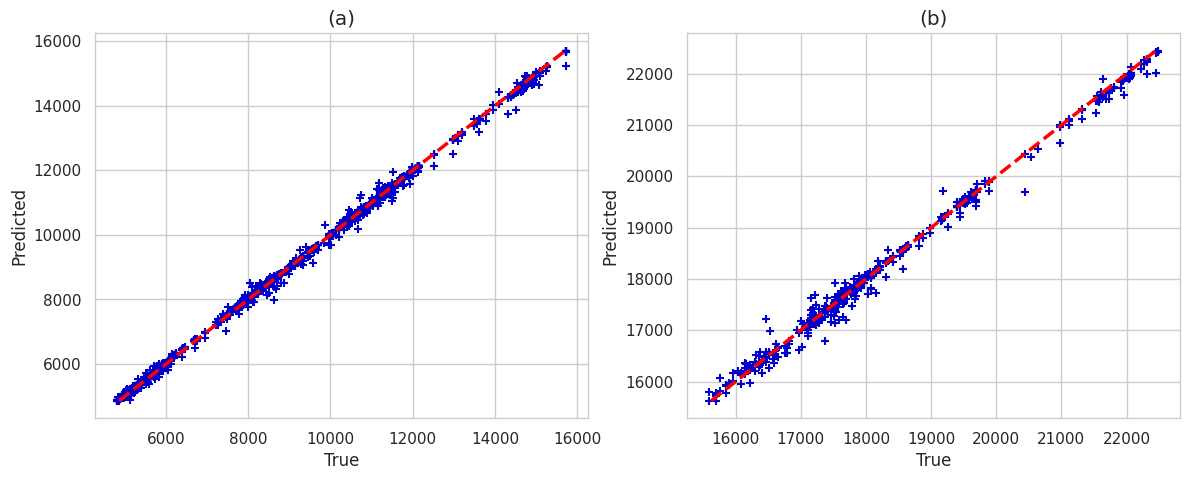

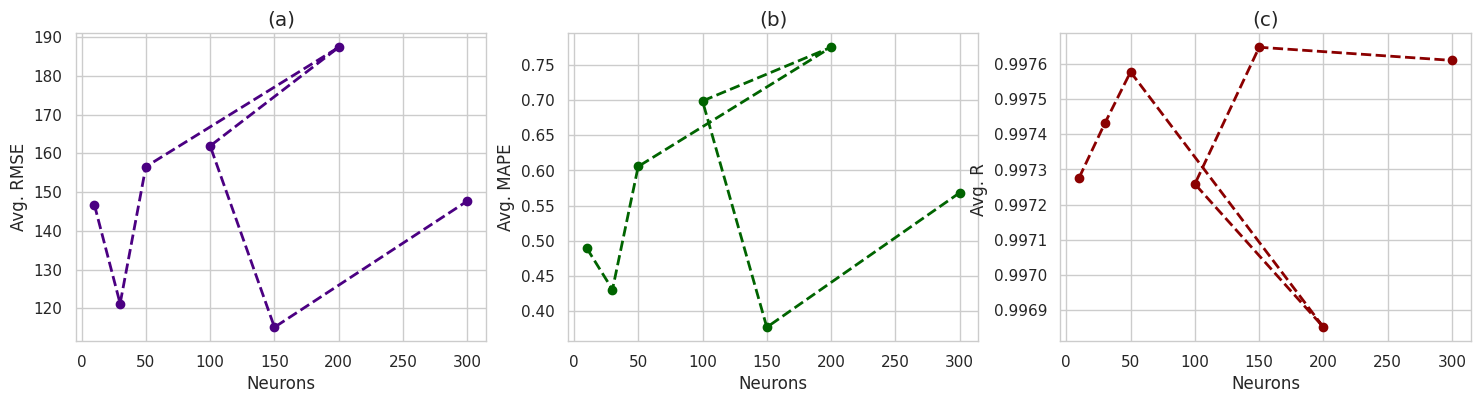

                   Close       MACD         ATR        RSI  USD_INR_Price  \
Time                                                                        
2010-02-19   5036.206420  23.610268   84.714144  42.309079      46.180000   
2010-02-22   5036.206420  23.096611   83.460276  43.465083      46.099998   
2010-02-23   5036.206420  23.240533   81.138828  44.877992      46.268002   
2010-02-24   5036.206420  22.133636   78.622483  43.887886      46.287998   
2010-02-25   5036.206420  21.054430   76.188020  44.021468      46.299999   
...                  ...        ...         ...        ...            ...   
2024-04-04  22451.830925  36.515170  231.216195  61.991780      83.373299   
2024-04-05  22477.108525  37.879463  222.557895  61.949612      83.477798   
2024-04-08  22477.108525  45.829626  219.775188  65.955629      83.296799   
2024-04-10  22477.108525  50.143154  209.353351  67.646765      83.224297   
2024-04-12  22477.108525  34.079944  212.260255  57.203434      83.349297   

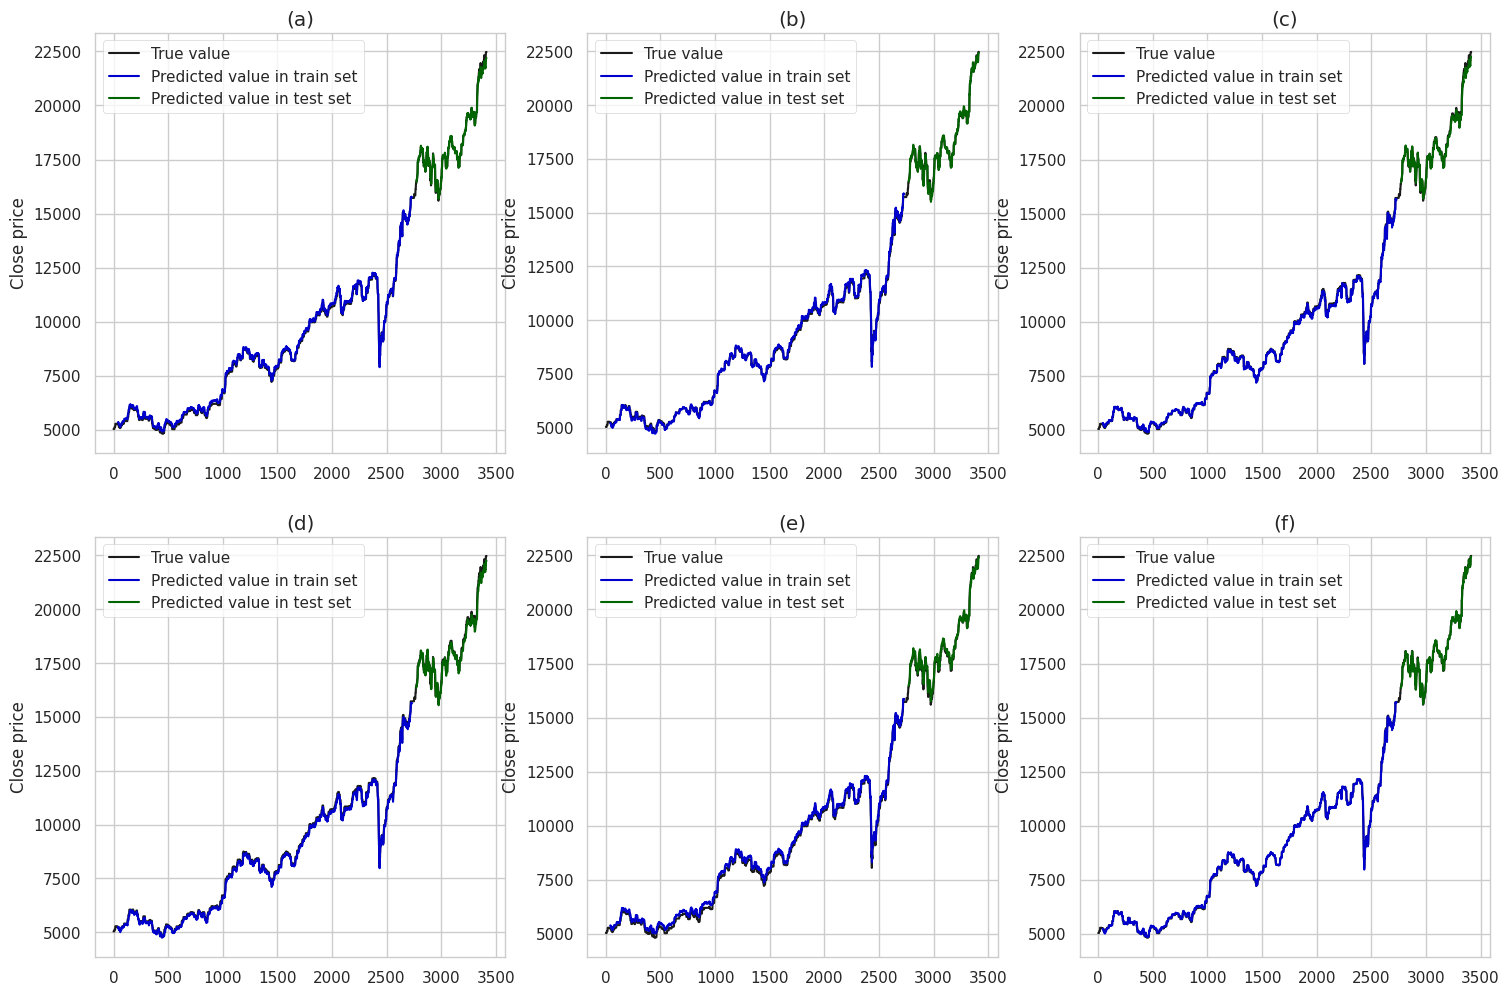

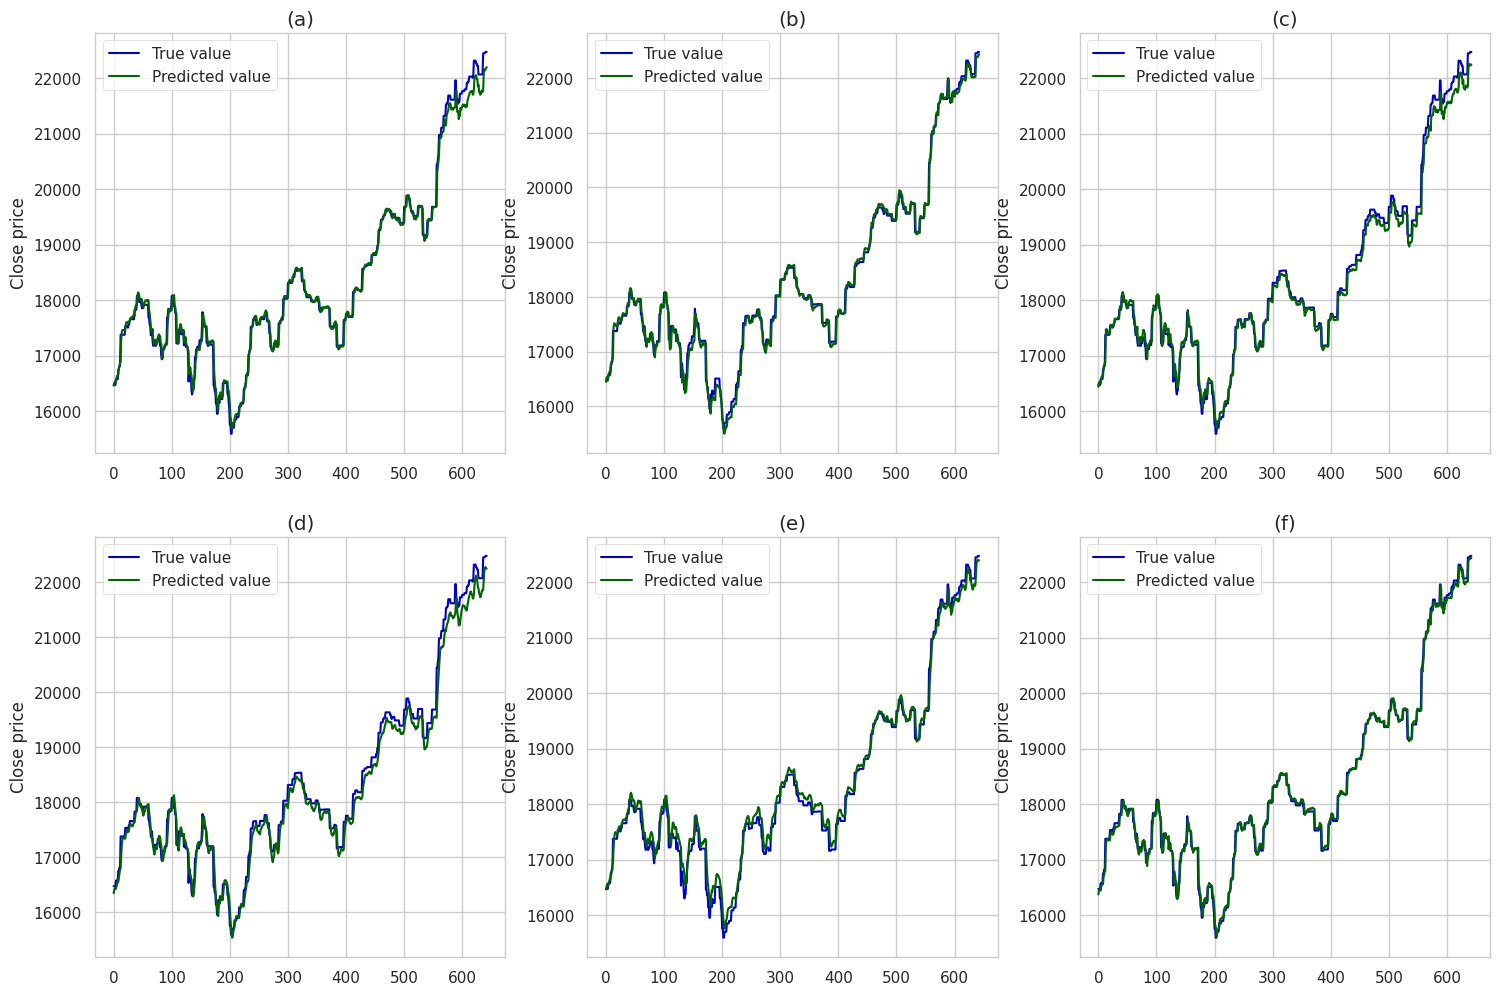

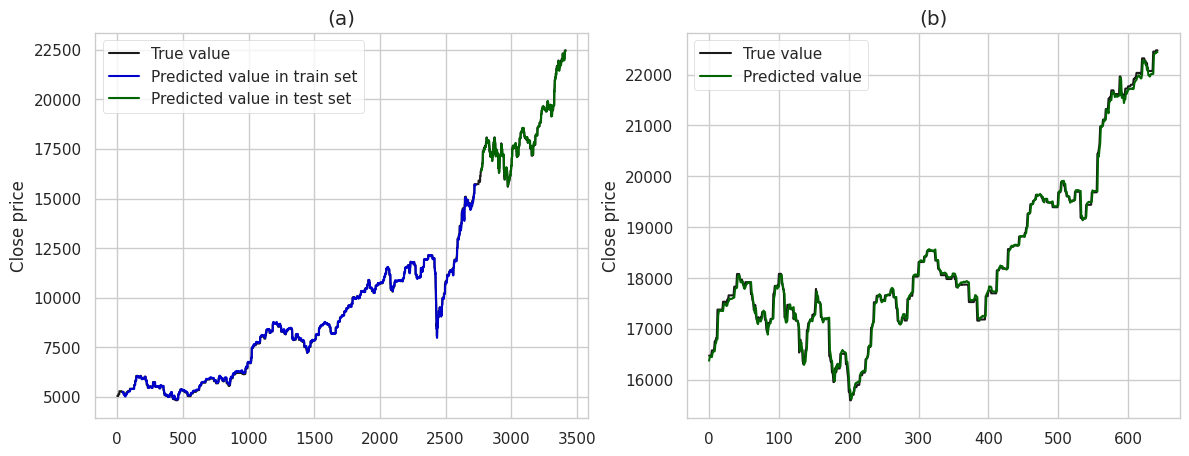

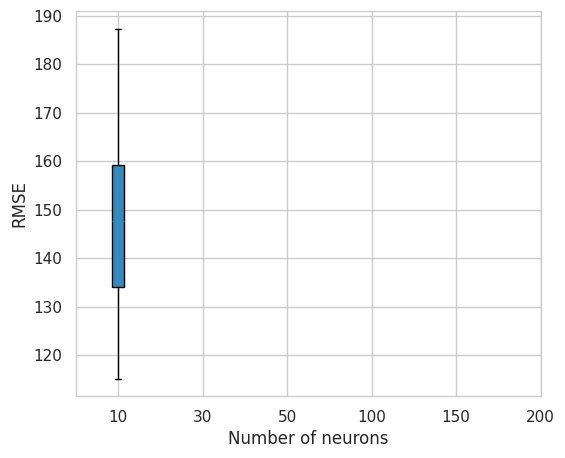

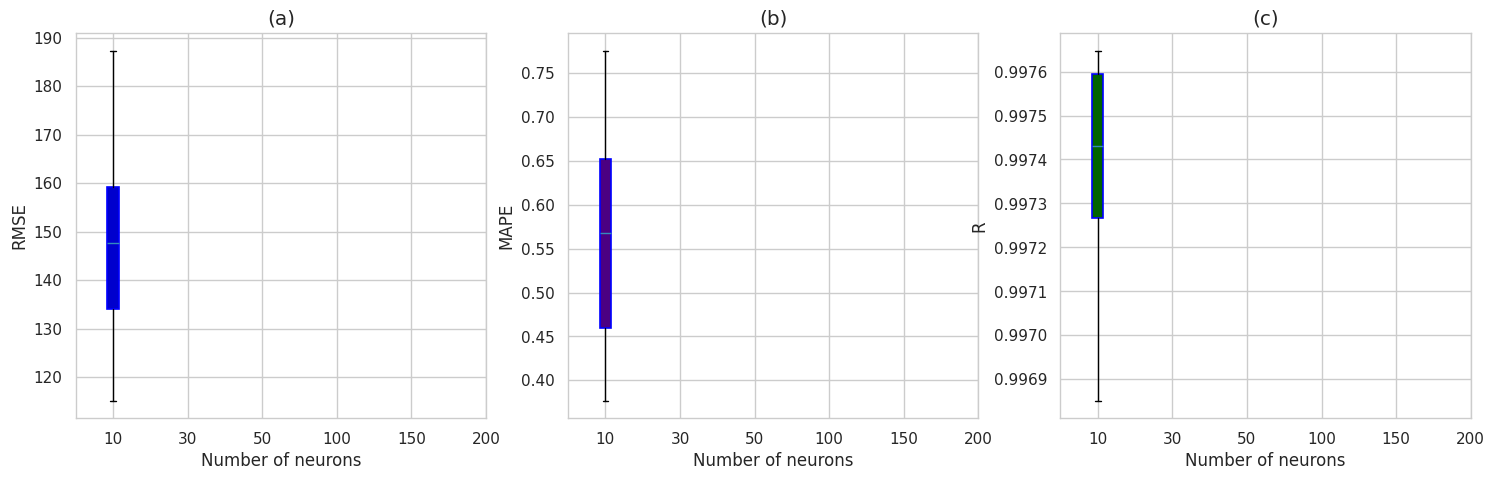

In [42]:
Util.create_visualization(sl_model_output)


### **Case II: Executing Multi-Layer Models**




In [42]:
hidden_layers = [[10,5],[50, 20], [200, 100,40], [300, 100], [30, 50, 20],[50,50,40]]
drop = 0
best_hyper_parameters_multilayers  = [['Nadam', 0.01, 8],#10-5N model
                                     ['Nadam', 0.01, 16],#20-10N model
                                     ['Nadam', 0.01, 8], #50-20N model
                                    ['Nadam', 0.01, 16], #100-50N model?
                                    ['Nadam', 0.01, 16], #150-100N model
                                    ['Nadam', 0.001, 8], #100-50-20N model
                                     ]

ml_model_output = run_multi_layer_LSTM_Model(hidden_layers, best_hyper_parameters_multilayers, nifty_data, time_step = 40, test_split = 0.2, epochs = 100,  num_replicates = 1 , dropout = drop)



Running model with hidden neurons:  [10, 5]


Best Hyper_parameters used:  ['Nadam', 0.01, 8]


Progress: Performing data preparation steps.......

Program is running for 0 replicate ----->

Epoch 1/100
337/337 [==============================] - 28s 9ms/step - loss: 0.0027
Epoch 2/100
337/337 [==============================] - 2s 7ms/step - loss: 3.8677e-04
Epoch 3/100
337/337 [==============================] - 3s 8ms/step - loss: 2.7497e-04
Epoch 4/100
337/337 [==============================] - 3s 8ms/step - loss: 1.7768e-04
Epoch 5/100
337/337 [==============================] - 3s 8ms/step - loss: 1.6757e-04
Epoch 6/100
337/337 [==============================] - 3s 9ms/step - loss: 1.7267e-04
Epoch 7/100
337/337 [==============================] - 3s 8ms/step - loss: 1.4197e-04
Epoch 8/100
337/337 [==============================] - 3s 8ms/step - loss: 1.2420e-04
Epoch 9/100
337/337 [==============================] - 3s 7ms/step - loss: 1.2664e-04
Epoch 10/100
337/337 [================

KeyboardInterrupt: 

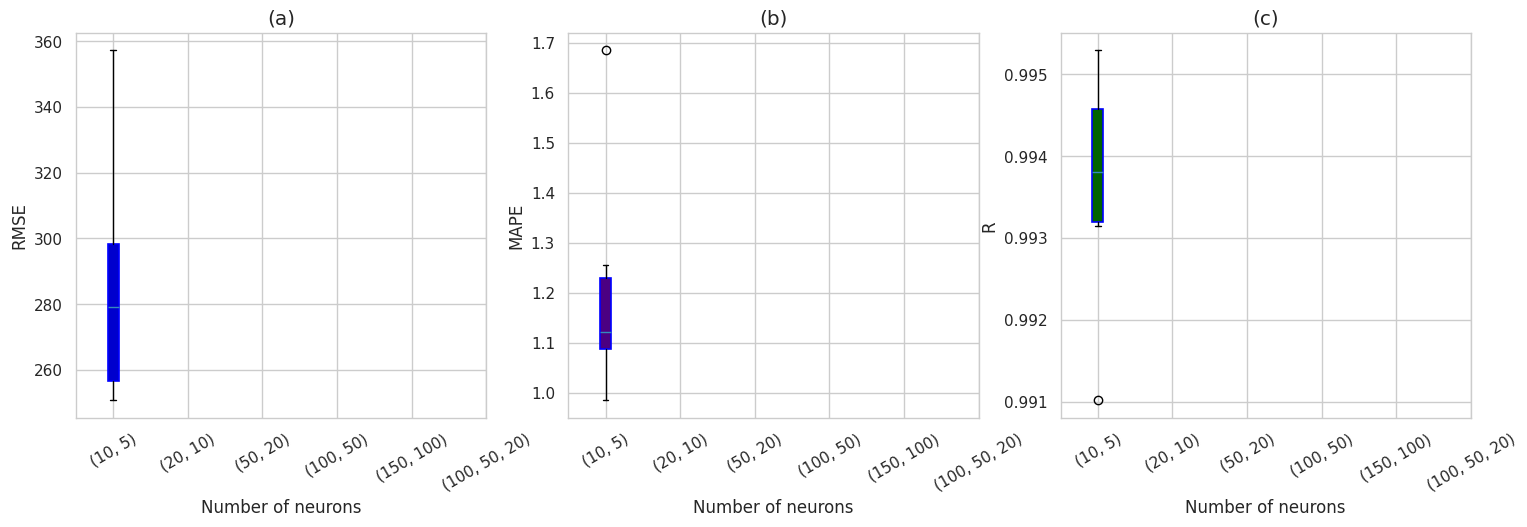

In [44]:
multi_layers_all_scores_boxplots(ml_model_output)